<a href="https://colab.research.google.com/github/yeaeunJi/deep_learning-/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*밑바닥부터 시작하는 딥러닝*
## 퍼셉트론에서 신경망으로
* 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질임

- 퍼셉트론과 다른 점을 중심으로 신경망 구조를 살펴봄
  - 신경망의 구조는 입력층 --> 은닉층 --> 출력층으로 구성됨
  - 신경망에서는 단층 퍼셉트론과는 다르게 활성화 함수로 시그모이드 함수와 같은 매끈한 활성화 함수를 사용하는 네트워크임

### 계단 함수 구현하기

- 활성화 함수(activation function) : 입력 신호의 총합을 출력 신호로 변환하는 함수

- 단순 퍼셉트론은 단층 네트워크에서 계단 함수(step function, 임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용

  - 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [1]:
def step_function(x) :
  if x > 0 :
    return 1
  else :
    return 0

In [2]:
# 위에서 작성한 함수는 부동 소수점만 사용할 수 있으므로 넘파이배열도 지원하도록 수정 가능
def step_function(x) :
  y = x > 0 # 넘파이 배열에 부등호 연산 수행 시 원소 각각의 연산을 수행한 bool 배열이 생성됨
  return y.astype(np.int) # np.astype()을 활용하면 넘파이 배열의 자료형이 변환됨

### 계단 함수의 그래프 그리기

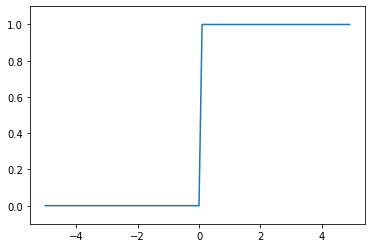

In [4]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x) :
  return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0까지 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# 0을 경계로 출력이 0에서 1로 바뀜. 

### 시그모이드 함수 구현하기
- 시그모이드 : 'S'자 모양이란 의미

In [10]:
def sigmoid(x) :
  return 1 / ( 1 + np.exp(-x)) # 넘파이 배열과 스칼라 값 연산은 브로드캐스트가 일어남

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

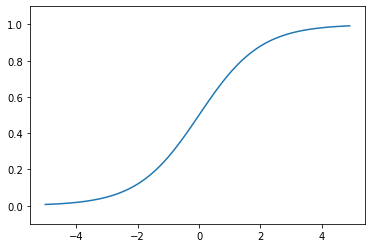

In [11]:
# 시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y )
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화함
- 계단 함수는 0을 경계로 출력이 갑자기 변화함

- 시그모이드 함수는 실수(0.1111, 0.2222 등)도 출력하지만 계단 함수는 0과 1 중 하나의 값만 출력

- 시그모이드 함수와 계단 함수로 모두 입력 값이 작을 때의 출력이 0에 가깝고(또는 0), 입력이 커지면 1에 가까워짐. 즉, 입력이 중요하면 큰 값을 출력하고, 그렇지 않으면 작은 값을 출력이며, 아무리 작거나 커도 출력은 0~1사이의 값임

- 이 둘의 중요한 공통점은 둘 모두 비선형 함수라는 것임

### 비선형 함수
- 선형 함수 : 함수의 출력 값이 입력의 상수배만큼 변화하는 함수
        f(x) = ax + b

- 비선형 함수 : 문자 그대로 선형이 아닌 함수, 즉 직선 1개로는 그릴 수 없는 함수

- 신경망에서는 비선형 함수를 사용해야 하는데, 선형 함수를 사용할 시에는 은닉층을 활용한 네트워크의 이점을 살릴 수 없기 때문이다. 
      y = h(h(ax)) ===> y = a*a*x와 동일하므로 결국 은닉층이 없는 네트워크로 표현 가능
       

### ReLU 함수
- 시그모이드 함수는 신경망 분야에서 오래전부터 이용되었으나, 최근에는 ReLU(Rectified Linear Unit, 렐루)함수를 주로 이용

- ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하일 경우에는 0출력
    
      h(x) = x (x > 0)
             0 (x <= 0)

In [12]:
# ReLU 함수
def relu(x) :
  return np.maximum(0, x) # 넘파이의 maximun 함수는 두 입력 중 큰 값을 선택하여 반환하는 함수

## 다차원 배열의 계산
### 다차원 배열
- 다차원 배열도 그 기본은 숫자의 집합임

In [13]:
# 1차원 배열
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [14]:
print(np.ndim(A))

1


In [15]:
print(A.shape)

(4,)


In [16]:
print(A.shape[0])

4


In [19]:
# 2차원 배열(행렬)
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 행렬의 곱

In [20]:
A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A,B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


### 신경망에서의 행렬 곱

In [21]:
# 편향과 활성화 함수를 생략하고 가중치만 가지는 신경망 구현
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기


In [24]:
# 입력층 ---> 은닉층 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [25]:
#  입력층에서 1층 은닉층으로 전달한 값을 활성화 함수로 변환
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
# 은닉층 1층에서 은닉층  2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [ ]:
# 은닉층 2층 ---> 출력층
# 출력층의 활성화 함수로 항등 함수를 사용하여 입력을 그대로 출력(구현안해도 됨)
# 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정의
# 회귀에는 항등 함수, 2클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적임
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = A3

### 구현 정리

In [28]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x) :
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = a3

  return y

network = init_network()
x = np.array([1.0, 0.5])
y =  forward(network, x) 
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기
- 신경망은 분류와 회귀 모두 이용 가능하며, 어떤 것을 목표로 하느냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐
- 일반적으로 회귀에서는 항등 함수, 분류에서는 소프트맥스 함수를 사용

### 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수(identity function) : 입력을 그대로 출력(입력신호==출력신호)

- 소프트맥수 함수(softmax function) : n개의 출력층을 갖는 k번째 출력 뉴런의 값을 분자는 k번째 뉴런의 입력 신호의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합

In [29]:
# 소프트맥스 함수 구현
# 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받음
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 모든 입력 신호의 지수 함수의 합
print(sum_exp_a )

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [30]:
def softmax(a) :
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

### 소프트맥스 함수 구현 시 주의점
- 지수함수를 사용하므로 오버플로 문제 발생 가능

In [32]:
# 입력신호의 최댓값을 빼주어 계산
def softmax(a) :
  c = np.max(a) 
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

### 소프트맥스 함수의 특징
- 소프트맥스 함수의 출력은 0~1.0 tkdldml tlftn
- 소프트맥스 함수의 출력의 총합은 1
  - 이와 같은 성질을 사용하여 소프트맥스의 출력을 '확률'로 해석 가능
  
  즉, 소프트맥스 함수를 이용하여 문제를 확률적(통계적)으로 대응 가능해짐

- 소프트맥스는 지수 함수를 사용하여 각 원소의 대소 관계가 변하지 않고 출력에서도 그 관계가 이어짐(즉, 원소들 중 두번째로 큰 a는  출력에서도 두번째로 크다)

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하고, 소프트맥스 함수를 사용해도 출력이 가장 큰 뉴런의 위치는 변화가 없으므로 컴퓨팅 자원 낭비를 줄이기위해 출력층의 소프트맥스 함수는 생략하는 것이 일반적임

- 신경망을 학습시킬 때에는 출력층에서 소프트맥스 함수를 사용하지만, 학습된 신경망 모델을 통해 미지의 데이터에 대한 추론(분류)를 수행할 경우에는 출력층의 소프트맥스 함수를 생략하는 것이 일반적임

### 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 문제에 맞게 정해야함
  - 분류 : 분류하고 싶은 클래스의 수로 설정하는 것이 일반적